# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.info()  # check if there are any missing values. No!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution of medical charges is highly skewed to the left, with some extreme values above 3 standard deviations from the mean and 50% of the medical charges are below 9382 dollars.

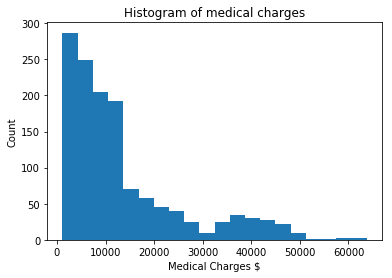

In [5]:
medical.charges.plot(kind='hist', bins=20)
plt.title('Histogram of medical charges')
plt.xlabel('Medical Charges $')
plt.ylabel('Count')
plt.show()

In [6]:
# sample mean and standard deviation
sample_mean, sample_sd = np.mean(medical.charges), np.std(medical.charges, ddof=1)
print('Sample mean and standard deviation are respectively:', [sample_mean, sample_sd])

Sample mean and standard deviation are respectively: [13270.422265141257, 12110.011236693994]


In [7]:
# 25%, median and 75% quantile of medical charges
np.quantile(medical.charges, [0.25, 0.5, 0.75])

array([ 4740.28715 ,  9382.033   , 16639.912515])

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The sample mean calculated from the 1338 random samples above is an unbiased estimator of the true mean of medical charges. Because the true standard deviation of medical charges is unknown, we do a t test to test the hypothesis that the true mean of medical charges is below 12000 dollars, and this is a one-sided t test.    

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ A one-sided confidence interval is appropriate, because we are testing the true mean is less than a null value, which is 12000 in this case. The alternative hypothesis is "true mean greater than or equal to 12000". Confidence interval is calculated below: (12725.49, +inf). This means 95% of the time the true medical charge will lie in this interval, and since 12000 doesn't lie in this interval, there should be no concern that the true average medical charge falls below 12000.

In [8]:
# critical value for 95% confidence interval
n = medical.shape[0]
critical_value = t.ppf(0.95, df=n-1)
print(critical_value)

1.6459941145571317


In [9]:
# margin of error
moe = critical_value * sample_sd / np.sqrt(n)
# for this particular one-sided confidence interval, only lower bound is needed, in the direction of the alternative hypothesis
lower = sample_mean - moe
print(lower)

12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__  The null hypothesis is people with or without insurance are charged the same. Alternative is the charges are different. So it's a 2 sided hypothesis. Assuming the true standard deviation of both groups is the same, and that we can use both sample standard deviations together to get a better estimate of that true standard deviation.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The p-value of the test statistics is very close to zero, so we can reject the null hypotheis and conclude that people are charged differently with or without insurance.


In [10]:
# manually calculate t statistics
insured = medical[medical.insuranceclaim == 1].charges
uninsured = medical[medical.insuranceclaim == 0].charges
n0 = len(uninsured)
n1 = len(insured)
print(n0, n1, n0+n1)

s0 = np.std(uninsured, ddof=1)
s1 = np.std(insured, ddof=1)
print(s0, s1)

x0 = np.mean(uninsured)
x1 = np.mean(insured)
print(x0, x1)

# calculate pooled standard deviation
sp = np.sqrt(((n0-1)*(s0**2)+(n1-1)*(s1**2))/(n0+n1-2))

# calculate t statistics
t_statistics = (x0-x1)/(sp*np.sqrt((1/n0)+(1/n1)))
print(t_statistics)

# calculate p value, close to 0
pvalue = 2 * t.cdf(t_statistics, df=(n0+n1-2))
print(pvalue)

555 783 1338
6446.510126811736 14045.928418802127
8821.421892306294 16423.928276537663
-11.89329903087671
4.461230231620972e-31


In [11]:
# use scipy.stat to do 2 sample t test
from scipy import stats
stats.ttest_ind(uninsured, insured, equal_var = True)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ The test statistics and p value is given below if we assume unequal variances of the 2 groups. The conclusion is still to reject the null hypothesis and claim there is a difference in the charges between the insured and uninsured groups.

In [12]:
stats.ttest_ind(uninsured, insured, equal_var = False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no z test function in scipy.stats

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test